# Ricky Doucette

## Research question/interests

### 1. Does the average change in a top NHL player's offensive stats from one season to the next have a negative correlation with their defensive stats? 
### 2. Does an increase in time on ice per game for a succesive season significantly increase an NHL player's overall statistics in that following season?


## Milestone 2 questions
Ricky: I am interested in this dataset because I am a fan of hockey and like to see the statistical aspects of players' performances. I would like to find if there is a correlation between drops and increases in certain statistics for consecutive years for the top NHL players in points. Specific examples of research questions I would like to discover answers to are: Does an increase/decrease in time on ice per game relate to an increase in certain stats like overall points in the season? Do the top players that have a decrease in their offensive stats in a successive season make up for it with an increase in their defensive stats? How many of the top 250 players in points from the 2017-2018 season managed to make the top 350 players in points for the 2018-2019 season? How many of those players didn't make the top 350 just because they retired?

To get more specific, the research questions I would primarily like to answer are:
1. Does the average change in a top NHL player's offensive stats from one season to the next have a negative correlation with their defensive stats? That is if a player has a decrease in say points, do their stats like +/- and blocked shots tend to increase?
2. Does an increase in time on ice per game significantly increase a player's overall statistics? We could define significance as an extra point per additional minute of time on ice per game. So say a player plays 82 games both seasons. If in the first season they score 100 points with 18 minutes of TOI and the following season they score 115 points with 18.5 minutes of TOI, we could deem their increase in ice time as a significant factor in their increase in points. The calculations to determine this would be as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
clean2017 = pd.read_csv('../data/processed/clean2017.csv')
clean2018 = pd.read_csv('../data/processed/clean2018.csv')


In [2]:
clean2017.shape

(225, 19)

In [3]:
clean2017.head()

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS
0,185,Aaron Ekblad,82,16,22,38,71,9,23:22,5,4,11,0.195,0.268,0.463,189,8.50%,69,121
1,115,Adam Henrique,81,24,26,50,20,11,17:46,6,8,13,0.296,0.321,0.617,151,15.90%,61,61
2,193,Adrian Kempe,81,16,21,37,49,11,13:19,1,3,5,0.198,0.259,0.457,119,13.50%,91,18
3,25,Aleksander Barkov,79,27,51,78,14,9,22:04,5,3,17,0.342,0.646,0.987,256,10.60%,30,67
4,102,Alex DeBrincat,82,28,24,52,6,6,14:48,6,1,12,0.341,0.293,0.634,181,15.50%,40,25


In [4]:
clean2017.columns

Index(['Rk', 'Name', 'GP', 'G', 'A', 'P', 'PIM', '+/-', 'TOI', 'PPG', 'GWG',
       'PPP', 'G/GP', 'A/GP', 'P/GP', 'SHOTS', 'SH%', 'HITS', 'BS'],
      dtype='object')

|Acronym|Meaning|
|---|---|
|Rk|Rank In List Accoring to Point Total|
|GP|Games Played|
|G|Goals Scored|
|A|Assists|
|P|Points|
|Pim|Penalty Minutes|
|+/-|Plus Minus|
|TOI|Average Time on Ice Per Game|
|PPG|Power-Play Goals|
|GWG|Game-Winning Goals|
|PPP|Power-Play Points|
|G/GP|Goals Per Game Played|
|A/GP|Assists Per Game Played|
|P/GP|Points Per Game Played|
|SHOTS|Shots On Goal|
|SH%|Percentage of Shots That Were Goals|
|HITS|Hits|
|BS|Blocked Shots|


In [5]:
clean2018.shape

(225, 19)

In [6]:
clean2018.head()

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS
0,193,Aaron Ekblad,82,13,24,37,47,1,23:38,5,1,10,0.159,0.293,0.451,180,7.20%,114,88
1,155,Adam Henrique,82,18,24,42,24,-5,16:27,8,3,13,0.220,0.293,0.512,122,14.80%,78,71
2,280,Adrian Kempe,81,12,16,28,50,-10,14:30,0,2,4,0.148,0.198,0.346,118,10.20%,86,21
3,10,Aleksander Barkov,82,35,61,96,8,-3,22:21,13,5,31,0.427,0.744,1.171,206,17.00%,28,61
4,33,Alex DeBrincat,82,41,35,76,15,0,17:42,13,3,24,0.500,0.427,0.927,220,18.60%,35,26


In [7]:
clean2018.columns

Index(['Rk', 'Name', 'GP', 'G', 'A', 'P', 'PIM', '+/-', 'TOI', 'PPG', 'GWG',
       'PPP', 'G/GP', 'A/GP', 'P/GP', 'SHOTS', 'SH%', 'HITS', 'BS'],
      dtype='object')

In [8]:
clean2017.describe()

,Rk,GP,G,A,P,PIM,+/-,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,HITS,BS
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,119.337778,76.871111,20.382222,32.933333,53.315556,33.915556,2.457778,5.413333,3.324444,15.537778,0.265622,0.429458,0.695053,184.671111,72.395556,52.977778
std,71.573274,6.997213,8.879935,12.503571,16.995876,20.680973,14.962430,3.718054,2.174646,8.532482,0.113192,0.158882,0.213646,50.790170,43.783446,35.712323
min,1.000000,44.000000,5.000000,13.000000,32.000000,2.000000,-42.000000,0.000000,0.000000,0.000000,0.061000,0.171000,0.390000,70.000000,7.000000,14.000000
25%,57.000000,74.000000,14.000000,23.000000,40.000000,20.000000,-6.000000,3.000000,2.000000,9.000000,0.188000,0.304000,0.524000,149.000000,40.000000,28.000000
50%,119.000000,80.000000,19.000000,31.000000,49.000000,30.000000,2.000000,5.000000,3.000000,14.000000,0.244000,0.394000,0.646000,182.000000,61.000000,42.000000
75%,179.000000,82.000000,25.000000,41.000000,64.000000,43.000000,11.000000,7.000000,4.000000,21.000000,0.342000,0.526000,0.833000,214.000000,95.000000,64.000000
max,250.000000,82.000000,49.000000,68.000000,108.000000,187.000000,49.000000,20.000000,12.000000,42.000000,0.598000,0.893000,1.317000,355.000000,250.000000,203.000000


In [9]:
clean2018.describe()

,Rk,GP,G,A,P,PIM,+/-,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,HITS,BS
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,135.622222,74.982222,20.191111,32.395556,52.586667,33.404444,1.475556,4.844444,3.231111,14.360000,0.267382,0.432213,0.699578,176.862222,73.057778,50.364444
std,91.661082,9.212746,10.500166,14.268753,21.124267,20.500239,13.548872,4.190527,2.074486,9.188463,0.131830,0.177400,0.254368,55.109336,43.348167,34.845585
min,1.000000,33.000000,2.000000,9.000000,23.000000,4.000000,-41.000000,0.000000,0.000000,0.000000,0.027000,0.113000,0.309000,62.000000,5.000000,7.000000
25%,57.000000,72.000000,13.000000,22.000000,36.000000,20.000000,-8.000000,2.000000,2.000000,7.000000,0.171000,0.299000,0.494000,136.000000,42.000000,26.000000
50%,120.000000,78.000000,18.000000,28.000000,48.000000,28.000000,0.000000,4.000000,3.000000,13.000000,0.250000,0.402000,0.646000,176.000000,61.000000,40.000000
75%,201.000000,82.000000,27.000000,41.000000,69.000000,44.000000,12.000000,7.000000,5.000000,20.000000,0.354000,0.537000,0.862000,209.000000,98.000000,61.000000
max,347.000000,83.000000,51.000000,87.000000,128.000000,153.000000,39.000000,20.000000,10.000000,48.000000,0.630000,1.061000,1.561000,365.000000,235.000000,166.000000


In [10]:
clean2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      225 non-null    int64  
 1   Name    225 non-null    object 
 2   GP      225 non-null    int64  
 3   G       225 non-null    int64  
 4   A       225 non-null    int64  
 5   P       225 non-null    int64  
 6   PIM     225 non-null    int64  
 7   +/-     225 non-null    int64  
 8   TOI     225 non-null    object 
 9   PPG     225 non-null    int64  
 10  GWG     225 non-null    int64  
 11  PPP     225 non-null    int64  
 12  G/GP    225 non-null    float64
 13  A/GP    225 non-null    float64
 14  P/GP    225 non-null    float64
 15  SHOTS   225 non-null    int64  
 16  SH%     225 non-null    object 
 17  HITS    225 non-null    int64  
 18  BS      225 non-null    int64  
dtypes: float64(3), int64(13), object(3)
memory usage: 33.5+ KB


In [11]:
clean2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      225 non-null    int64  
 1   Name    225 non-null    object 
 2   GP      225 non-null    int64  
 3   G       225 non-null    int64  
 4   A       225 non-null    int64  
 5   P       225 non-null    int64  
 6   PIM     225 non-null    int64  
 7   +/-     225 non-null    int64  
 8   TOI     225 non-null    object 
 9   PPG     225 non-null    int64  
 10  GWG     225 non-null    int64  
 11  PPP     225 non-null    int64  
 12  G/GP    225 non-null    float64
 13  A/GP    225 non-null    float64
 14  P/GP    225 non-null    float64
 15  SHOTS   225 non-null    int64  
 16  SH%     225 non-null    object 
 17  HITS    225 non-null    int64  
 18  BS      225 non-null    int64  
dtypes: float64(3), int64(13), object(3)
memory usage: 33.5+ KB


In [12]:
from datetime import time

In [13]:
z = []
for i in clean2017.index:
    x = float(clean2017['TOI'][i][0:2])
    y = round(float(clean2017['TOI'][i][3:])/60,2)
    z.append(x+y)
z
clean2017['TOI_as_int'] = z
clean2017

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI_as_int
0,185,Aaron Ekblad,82,16,22,38,71,9,23:22,5,4,11,0.195,0.268,0.463,189,8.50%,69,121,23.37
1,115,Adam Henrique,81,24,26,50,20,11,17:46,6,8,13,0.296,0.321,0.617,151,15.90%,61,61,17.77
2,193,Adrian Kempe,81,16,21,37,49,11,13:19,1,3,5,0.198,0.259,0.457,119,13.50%,91,18,13.32
3,25,Aleksander Barkov,79,27,51,78,14,9,22:04,5,3,17,0.342,0.646,0.987,256,10.60%,30,67,22.07
4,102,Alex DeBrincat,82,28,24,52,6,6,14:48,6,1,12,0.341,0.293,0.634,181,15.50%,40,25,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,23,William Karlsson,82,43,35,78,12,49,18:43,8,6,16,0.524,0.427,0.951,184,23.40%,48,45,18.72
221,70,William Nylander,82,20,41,61,10,20,16:41,5,8,12,0.244,0.500,0.744,184,10.90%,21,18,16.68
222,56,Yanni Gourde,82,25,39,64,50,34,16:09,7,5,13,0.305,0.476,0.780,136,18.40%,57,42,16.15
223,178,Zach Hyman,82,15,25,40,37,22,17:21,0,2,0,0.183,0.305,0.488,148,10.10%,117,55,17.35


In [14]:
c = []
for i in clean2018.index:
    a = float(clean2018['TOI'][i][0:2])
    b = round(float(clean2018['TOI'][i][3:])/60,2)
    c.append(a+b)
clean2018['TOI_as_int'] = c
clean2018

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI_as_int
0,193,Aaron Ekblad,82,13,24,37,47,1,23:38,5,1,10,0.159,0.293,0.451,180,7.20%,114,88,23.63
1,155,Adam Henrique,82,18,24,42,24,-5,16:27,8,3,13,0.220,0.293,0.512,122,14.80%,78,71,16.45
2,280,Adrian Kempe,81,12,16,28,50,-10,14:30,0,2,4,0.148,0.198,0.346,118,10.20%,86,21,14.50
3,10,Aleksander Barkov,82,35,61,96,8,-3,22:21,13,5,31,0.427,0.744,1.171,206,17.00%,28,61,22.35
4,33,Alex DeBrincat,82,41,35,76,15,0,17:42,13,3,24,0.500,0.427,0.927,220,18.60%,35,26,17.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,82,William Karlsson,82,24,32,56,16,1,18:50,7,5,14,0.293,0.390,0.683,169,14.20%,51,55,18.83
221,299,William Nylander,54,7,20,27,16,-4,15:30,1,0,6,0.130,0.370,0.500,130,5.40%,16,14,15.50
222,118,Yanni Gourde,80,22,26,48,66,9,15:50,5,5,9,0.275,0.325,0.600,130,16.90%,83,30,15.83
223,160,Zach Hyman,71,21,20,41,65,16,17:16,0,4,0,0.296,0.282,0.577,144,14.60%,102,39,17.27


In [15]:
clean2017['M/P'] = (clean2017['TOI_as_int']*clean2017['GP'])/clean2017['P']
clean2017

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,...,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI_as_int,M/P
0,185,Aaron Ekblad,82,16,22,38,71,9,23:22,5,...,11,0.195,0.268,0.463,189,8.50%,69,121,23.37,50.430000
1,115,Adam Henrique,81,24,26,50,20,11,17:46,6,...,13,0.296,0.321,0.617,151,15.90%,61,61,17.77,28.787400
2,193,Adrian Kempe,81,16,21,37,49,11,13:19,1,...,5,0.198,0.259,0.457,119,13.50%,91,18,13.32,29.160000
3,25,Aleksander Barkov,79,27,51,78,14,9,22:04,5,...,17,0.342,0.646,0.987,256,10.60%,30,67,22.07,22.352949
4,102,Alex DeBrincat,82,28,24,52,6,6,14:48,6,...,12,0.341,0.293,0.634,181,15.50%,40,25,14.80,23.338462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,23,William Karlsson,82,43,35,78,12,49,18:43,8,...,16,0.524,0.427,0.951,184,23.40%,48,45,18.72,19.680000
221,70,William Nylander,82,20,41,61,10,20,16:41,5,...,12,0.244,0.500,0.744,184,10.90%,21,18,16.68,22.422295
222,56,Yanni Gourde,82,25,39,64,50,34,16:09,7,...,13,0.305,0.476,0.780,136,18.40%,57,42,16.15,20.692187
223,178,Zach Hyman,82,15,25,40,37,22,17:21,0,...,0,0.183,0.305,0.488,148,10.10%,117,55,17.35,35.567500


In [16]:
clean2018['M/P'] = (clean2018['TOI_as_int']*clean2018['GP'])/clean2018['P']
clean2018

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,...,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI_as_int,M/P
0,193,Aaron Ekblad,82,13,24,37,47,1,23:38,5,...,10,0.159,0.293,0.451,180,7.20%,114,88,23.63,52.369189
1,155,Adam Henrique,82,18,24,42,24,-5,16:27,8,...,13,0.220,0.293,0.512,122,14.80%,78,71,16.45,32.116667
2,280,Adrian Kempe,81,12,16,28,50,-10,14:30,0,...,4,0.148,0.198,0.346,118,10.20%,86,21,14.50,41.946429
3,10,Aleksander Barkov,82,35,61,96,8,-3,22:21,13,...,31,0.427,0.744,1.171,206,17.00%,28,61,22.35,19.090625
4,33,Alex DeBrincat,82,41,35,76,15,0,17:42,13,...,24,0.500,0.427,0.927,220,18.60%,35,26,17.70,19.097368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,82,William Karlsson,82,24,32,56,16,1,18:50,7,...,14,0.293,0.390,0.683,169,14.20%,51,55,18.83,27.572500
221,299,William Nylander,54,7,20,27,16,-4,15:30,1,...,6,0.130,0.370,0.500,130,5.40%,16,14,15.50,31.000000
222,118,Yanni Gourde,80,22,26,48,66,9,15:50,5,...,9,0.275,0.325,0.600,130,16.90%,83,30,15.83,26.383333
223,160,Zach Hyman,71,21,20,41,65,16,17:16,0,...,0,0.296,0.282,0.577,144,14.60%,102,39,17.27,29.906585


In [17]:
moreIce = []
lessIce = []
for i in clean2017.index:
    if clean2018['TOI_as_int'][i] > clean2017['TOI_as_int'][i]:
        moreIce.append(i) 
        #players who got more TOI in 2018 than 2017 from dataset
    else:
        lessIce.append(i) 
        #players who got less TOI in 2018 than 2017 from dataset

In [18]:
len(lessIce)

107

In [19]:
len(moreIce)

118

Text(0.2, 0.41, 'y = -0.0144 + 0.0650x')

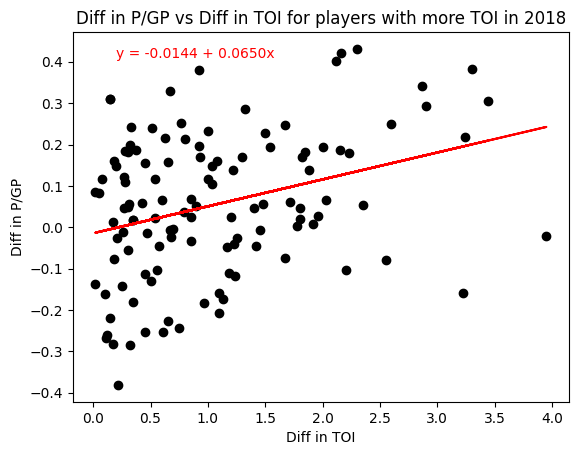

In [20]:
x = (clean2018['TOI_as_int'][moreIce]) - (clean2017['TOI_as_int'][moreIce])
y = clean2018['P/GP'][moreIce] - clean2017['P/GP'][moreIce]

a, b = np.polyfit(x,y, 1)
plt.scatter(x,y, color = 'black')
plt.plot(x, a*x +b, color='red') 
plt.title("Diff in P/GP vs Diff in TOI for players with more TOI in 2018")
plt.ylabel("Diff in P/GP")
plt.xlabel("Diff in TOI")

plt.text(0.2, 0.41, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', size=10, color = 'red')

This graph shows that it does seem like the players with more TOI in 2018 compared to 2017 in our dataset tend to to have more goals per game played on average.

In [21]:
TOIvsP = pd.DataFrame()

TOIvsP['Diff in TOI'] = x
TOIvsP['Diff in P/GP'] = y

TOIvsP



,Diff in TOI,Diff in P/GP
0,0.26,-0.012
2,1.18,-0.111
3,0.28,0.184
4,2.90,0.293
9,1.50,0.229
...,...,...
210,1.10,-0.158
214,1.40,0.046
219,3.22,-0.158
220,0.11,-0.268


<Axes: >

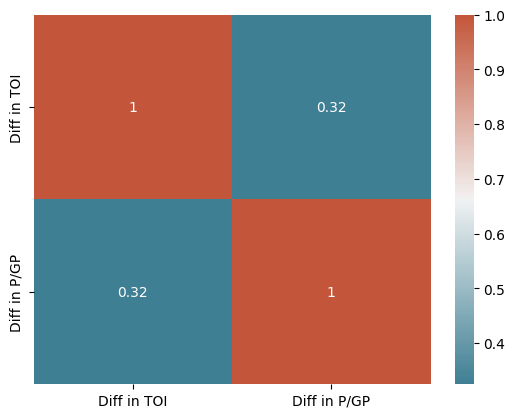

In [22]:
TOIvsPcorr = TOIvsP.corr()
sns.heatmap(TOIvsPcorr, xticklabels=TOIvsPcorr.columns, yticklabels=TOIvsPcorr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

This confirms that players who do get more icetime in 2018 tend to have more points per game than they had in 2017

In [23]:
# x = (clean2018['TOI_as_int'][moreIce]*clean2018['GP'][moreIce]) - (clean2017['TOI_as_int'][moreIce]*clean2017['GP'][moreIce])
# y = clean2018['P'][moreIce] - clean2017['P'][moreIce]

# a, b = np.polyfit(x,y, 1)
# plt.scatter(x,y, color = 'black')
# plt.plot(x, a*x +b, color='red') 

# plt.text(-750, 30, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', size=10, color = 'red')

In [24]:
# s=((clean2018['TOI_as_int'][moreIce]*clean2018['GP'][moreIce]) - (clean2017['TOI_as_int'][moreIce]*clean2017['GP'][moreIce])).std()

In [25]:
# m = ((clean2018['TOI_as_int'][moreIce]*clean2018['GP'][moreIce]) - (clean2017['TOI_as_int'][moreIce]*clean2017['GP'][moreIce])).mean()

In [26]:
# x = (((clean2018['TOI_as_int'][moreIce]*clean2018['GP'][moreIce]) - (clean2017['TOI_as_int'][moreIce]*clean2017['GP'][moreIce]))-m)/s
# y = clean2018['P'][moreIce] - clean2017['P'][moreIce]

# #abs(x)<3.5 is to not include the two significant outliers in the construction of the fitted line
# a, b = np.polyfit(x[abs(x)<3.5],y[abs(x)<3.5], 1)
# plt.scatter(x,y, color = 'black')
# plt.plot(x[abs(x)<3.5], a*x[abs(x)<3.5] +b, color='red') 

# plt.text(-4, 30, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', size=10, color = 'red')

In [27]:
c = []
for i in clean2018.index:
    c.append(round(float(clean2018['SH%'][i][:-1])/100,4))
clean2018['SH%'] = c


In [28]:
c = []
for i in clean2017.index:
    c.append(round(float(clean2017['SH%'][i][:-1])/100,4))
clean2017['SH%'] = c
clean2017

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,...,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI_as_int,M/P
0,185,Aaron Ekblad,82,16,22,38,71,9,23:22,5,...,11,0.195,0.268,0.463,189,0.085,69,121,23.37,50.430000
1,115,Adam Henrique,81,24,26,50,20,11,17:46,6,...,13,0.296,0.321,0.617,151,0.159,61,61,17.77,28.787400
2,193,Adrian Kempe,81,16,21,37,49,11,13:19,1,...,5,0.198,0.259,0.457,119,0.135,91,18,13.32,29.160000
3,25,Aleksander Barkov,79,27,51,78,14,9,22:04,5,...,17,0.342,0.646,0.987,256,0.106,30,67,22.07,22.352949
4,102,Alex DeBrincat,82,28,24,52,6,6,14:48,6,...,12,0.341,0.293,0.634,181,0.155,40,25,14.80,23.338462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,23,William Karlsson,82,43,35,78,12,49,18:43,8,...,16,0.524,0.427,0.951,184,0.234,48,45,18.72,19.680000
221,70,William Nylander,82,20,41,61,10,20,16:41,5,...,12,0.244,0.500,0.744,184,0.109,21,18,16.68,22.422295
222,56,Yanni Gourde,82,25,39,64,50,34,16:09,7,...,13,0.305,0.476,0.780,136,0.184,57,42,16.15,20.692187
223,178,Zach Hyman,82,15,25,40,37,22,17:21,0,...,0,0.183,0.305,0.488,148,0.101,117,55,17.35,35.567500


In [29]:
clean2017 = clean2017.drop(columns = ['TOI'])

In [30]:
clean2017 = clean2017.rename(columns = {"TOI_as_int":"TOI"})

In [31]:
clean2017

,Rk,Name,GP,G,A,P,PIM,+/-,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI,M/P
0,185,Aaron Ekblad,82,16,22,38,71,9,5,4,11,0.195,0.268,0.463,189,0.085,69,121,23.37,50.430000
1,115,Adam Henrique,81,24,26,50,20,11,6,8,13,0.296,0.321,0.617,151,0.159,61,61,17.77,28.787400
2,193,Adrian Kempe,81,16,21,37,49,11,1,3,5,0.198,0.259,0.457,119,0.135,91,18,13.32,29.160000
3,25,Aleksander Barkov,79,27,51,78,14,9,5,3,17,0.342,0.646,0.987,256,0.106,30,67,22.07,22.352949
4,102,Alex DeBrincat,82,28,24,52,6,6,6,1,12,0.341,0.293,0.634,181,0.155,40,25,14.80,23.338462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,23,William Karlsson,82,43,35,78,12,49,8,6,16,0.524,0.427,0.951,184,0.234,48,45,18.72,19.680000
221,70,William Nylander,82,20,41,61,10,20,5,8,12,0.244,0.500,0.744,184,0.109,21,18,16.68,22.422295
222,56,Yanni Gourde,82,25,39,64,50,34,7,5,13,0.305,0.476,0.780,136,0.184,57,42,16.15,20.692187
223,178,Zach Hyman,82,15,25,40,37,22,0,2,0,0.183,0.305,0.488,148,0.101,117,55,17.35,35.567500


In [32]:
clean2018 = clean2018.drop(columns = ['TOI'])
clean2018 = clean2018.rename(columns = {"TOI_as_int":"TOI"})
clean2018

,Rk,Name,GP,G,A,P,PIM,+/-,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,TOI,M/P
0,193,Aaron Ekblad,82,13,24,37,47,1,5,1,10,0.159,0.293,0.451,180,0.072,114,88,23.63,52.369189
1,155,Adam Henrique,82,18,24,42,24,-5,8,3,13,0.220,0.293,0.512,122,0.148,78,71,16.45,32.116667
2,280,Adrian Kempe,81,12,16,28,50,-10,0,2,4,0.148,0.198,0.346,118,0.102,86,21,14.50,41.946429
3,10,Aleksander Barkov,82,35,61,96,8,-3,13,5,31,0.427,0.744,1.171,206,0.170,28,61,22.35,19.090625
4,33,Alex DeBrincat,82,41,35,76,15,0,13,3,24,0.500,0.427,0.927,220,0.186,35,26,17.70,19.097368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,82,William Karlsson,82,24,32,56,16,1,7,5,14,0.293,0.390,0.683,169,0.142,51,55,18.83,27.572500
221,299,William Nylander,54,7,20,27,16,-4,1,0,6,0.130,0.370,0.500,130,0.054,16,14,15.50,31.000000
222,118,Yanni Gourde,80,22,26,48,66,9,5,5,9,0.275,0.325,0.600,130,0.169,83,30,15.83,26.383333
223,160,Zach Hyman,71,21,20,41,65,16,0,4,0,0.296,0.282,0.577,144,0.146,102,39,17.27,29.906585


In [33]:
#Turning the TOI into total time on ice for all the games they played and dropping 
#unnessary columns or ones that are oblious correlated with many other variables
temp2017 = clean2017.copy()
temp2017['TOI']= temp2017['TOI']*temp2017['GP']
temp2017 = temp2017.drop(temp2017.columns[[0,1,2,8,9,10,11,12,13,19]], axis=1)
temp2017

,G,A,P,PIM,+/-,SHOTS,SH%,HITS,BS,TOI
0,16,22,38,71,9,189,0.085,69,121,1916.34
1,24,26,50,20,11,151,0.159,61,61,1439.37
2,16,21,37,49,11,119,0.135,91,18,1078.92
3,27,51,78,14,9,256,0.106,30,67,1743.53
4,28,24,52,6,6,181,0.155,40,25,1213.60
...,...,...,...,...,...,...,...,...,...,...
220,43,35,78,12,49,184,0.234,48,45,1535.04
221,20,41,61,10,20,184,0.109,21,18,1367.76
222,25,39,64,50,34,136,0.184,57,42,1324.30
223,15,25,40,37,22,148,0.101,117,55,1422.70


In [34]:
temp2018 = clean2018.copy()
temp2018['TOI']= temp2018['TOI']*temp2018['GP']
temp2018 = temp2018.drop(temp2018.columns[[0,1,2,8,9,10,11,12,13,19]], axis=1)
temp2018

,G,A,P,PIM,+/-,SHOTS,SH%,HITS,BS,TOI
0,13,24,37,47,1,180,0.072,114,88,1937.66
1,18,24,42,24,-5,122,0.148,78,71,1348.90
2,12,16,28,50,-10,118,0.102,86,21,1174.50
3,35,61,96,8,-3,206,0.170,28,61,1832.70
4,41,35,76,15,0,220,0.186,35,26,1451.40
...,...,...,...,...,...,...,...,...,...,...
220,24,32,56,16,1,169,0.142,51,55,1544.06
221,7,20,27,16,-4,130,0.054,16,14,837.00
222,22,26,48,66,9,130,0.169,83,30,1266.40
223,21,20,41,65,16,144,0.146,102,39,1226.17


<Axes: >

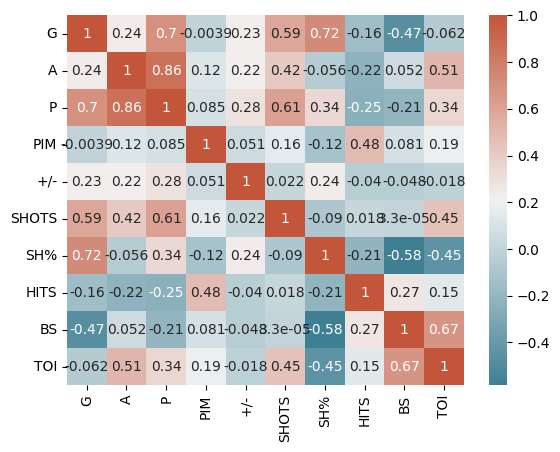

In [35]:
corr2017 = temp2017.corr()
sns.heatmap(corr2017, xticklabels=corr2017.columns, yticklabels=corr2017.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<Axes: >

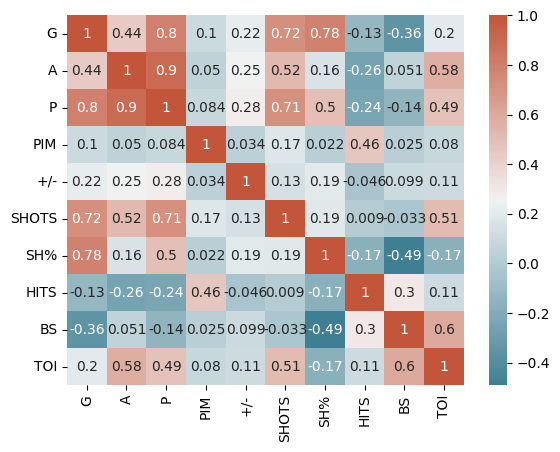

In [36]:
corr2018 = temp2018.corr()
sns.heatmap(corr2018, xticklabels=corr2018.columns, yticklabels=corr2018.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

This shows the correlation between the variables that I deemed more important and not as obviously correlated to many other variables such as games played. There are a few obvious correlations such as points with assists and points with goals. If you were informed on hockey, there are some correlations that would be expected as well that we see such as goals with shooting percentage and shots, shots with points, hits with penalty minutes, and TOI with shots.
What surprises me is that TOI isn't as correlated with as many other variables as I would have expected and how much more significantly it is correlated with points in 2018 compared to in 2017.

In [37]:
offense = pd.DataFrame()
offense['Name'] = clean2017['Name']

offense['G_2017'] = temp2017['G']
offense['G_2018'] = temp2018['G']

offense['A_2017']= temp2017['A']
offense['A_2018']= temp2018['A']

offense['P_2017']= temp2017['P']
offense['P_2018']= temp2018['P']

offense['TOI_2017']= temp2017['TOI']
offense['TOI_2018']= temp2018['TOI']

offense



,Name,G_2017,G_2018,A_2017,A_2018,P_2017,P_2018,TOI_2017,TOI_2018
0,Aaron Ekblad,16,13,22,24,38,37,1916.34,1937.66
1,Adam Henrique,24,18,26,24,50,42,1439.37,1348.90
2,Adrian Kempe,16,12,21,16,37,28,1078.92,1174.50
3,Aleksander Barkov,27,35,51,61,78,96,1743.53,1832.70
4,Alex DeBrincat,28,41,24,35,52,76,1213.60,1451.40
...,...,...,...,...,...,...,...,...,...
220,William Karlsson,43,24,35,32,78,56,1535.04,1544.06
221,William Nylander,20,7,41,20,61,27,1367.76,837.00
222,Yanni Gourde,25,22,39,26,64,48,1324.30,1266.40
223,Zach Hyman,15,21,25,20,40,41,1422.70,1226.17


In [38]:
defense = pd.DataFrame()
defense['Name'] = clean2017['Name']

defense['PIM_2017'] = clean2017['PIM']
defense['PIM_2018'] = clean2018['PIM']

defense['HITS_2017'] = clean2017['HITS']
defense['HITS_2018'] = clean2018['HITS']

defense['+/-_2017'] = clean2017['+/-']
defense['+/-_2018'] = clean2018['+/-']

defense['BS_2017'] = clean2017['BS']
defense['BS_2018'] = clean2018['BS']

defense['TOI_2017'] = clean2017['TOI']
defense['TOI_2018'] = clean2018['TOI']

defense

,Name,PIM_2017,PIM_2018,HITS_2017,HITS_2018,+/-_2017,+/-_2018,BS_2017,BS_2018,TOI_2017,TOI_2018
0,Aaron Ekblad,71,47,69,114,9,1,121,88,23.37,23.63
1,Adam Henrique,20,24,61,78,11,-5,61,71,17.77,16.45
2,Adrian Kempe,49,50,91,86,11,-10,18,21,13.32,14.50
3,Aleksander Barkov,14,8,30,28,9,-3,67,61,22.07,22.35
4,Alex DeBrincat,6,15,40,35,6,0,25,26,14.80,17.70
...,...,...,...,...,...,...,...,...,...,...,...
220,William Karlsson,12,16,48,51,49,1,45,55,18.72,18.83
221,William Nylander,10,16,21,16,20,-4,18,14,16.68,15.50
222,Yanni Gourde,50,66,57,83,34,9,42,30,16.15,15.83
223,Zach Hyman,37,65,117,102,22,16,55,39,17.35,17.27


/var/folders/5r/l3chx71j51525snltj8yxcg80000gn/T/ipykernel_1903/2102217641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  oCorr = offense.corr()


<Axes: >

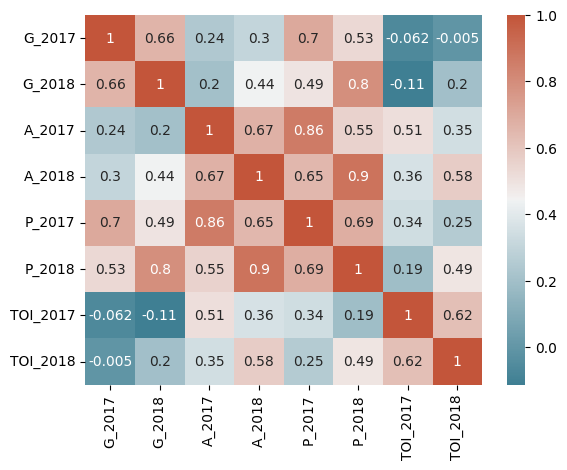

In [39]:
oCorr = offense.corr()

sns.heatmap(oCorr, xticklabels=oCorr.columns,  yticklabels=oCorr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

This correlation plot I found to be very interesting. All of the offensive variables from the 2017 dataset are correlated with the same variable from the 2018 dataset in a range of 0.62 to 0.69!

/var/folders/5r/l3chx71j51525snltj8yxcg80000gn/T/ipykernel_1903/4063524150.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dCorr = defense.corr()


<Axes: >

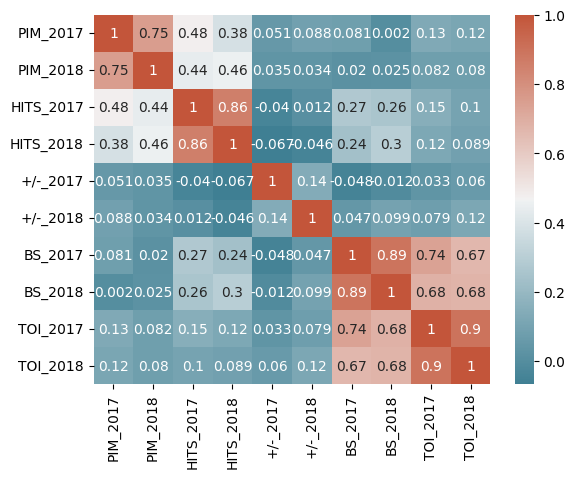

In [40]:
dCorr = defense.corr()

sns.heatmap(dCorr, xticklabels=dCorr.columns,  yticklabels=dCorr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

This too is very interesting. From the different seasons, blocked shots, penalty minutes, and hits are very correlated. TOI is pretty correlated as well. The plus minus however is not correlated whatsoever between seasons.

In [41]:
oVSdef = pd.DataFrame()

oVSdef['Name'] = clean2017['Name']
oVSdef['G_Diff'] = temp2017['G'] - temp2018['G']
oVSdef['A_Diff']= temp2017['A'] - temp2018['A']
oVSdef['P_Diff']= temp2017['P'] - temp2018['P']

oVSdef['PIM_Diff'] = clean2017['PIM']- clean2018['PIM']
oVSdef['HITS_Diff'] = clean2017['HITS']- clean2018['HITS']
oVSdef['+/-_Diff'] = clean2017['+/-']- clean2018['+/-']
oVSdef['BS_Diff'] = clean2017['BS']- clean2018['BS']

oVSdef

,Name,G_Diff,A_Diff,P_Diff,PIM_Diff,HITS_Diff,+/-_Diff,BS_Diff
0,Aaron Ekblad,3,-2,1,24,-45,8,33
1,Adam Henrique,6,2,8,-4,-17,16,-10
2,Adrian Kempe,4,5,9,-1,5,21,-3
3,Aleksander Barkov,-8,-10,-18,6,2,12,6
4,Alex DeBrincat,-13,-11,-24,-9,5,6,-1
...,...,...,...,...,...,...,...,...
220,William Karlsson,19,3,22,-4,-3,48,-10
221,William Nylander,13,21,34,-6,5,24,4
222,Yanni Gourde,3,13,16,-16,-26,25,12
223,Zach Hyman,-6,5,-1,-28,15,6,16


/var/folders/5r/l3chx71j51525snltj8yxcg80000gn/T/ipykernel_1903/850858799.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  oVSdefCorr = oVSdef.corr()


<Axes: >

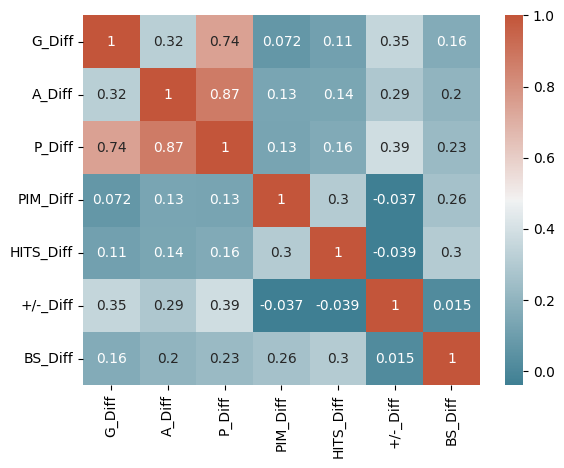

In [42]:
oVSdefCorr = oVSdef.corr()

sns.heatmap(oVSdefCorr, xticklabels=oVSdefCorr.columns,  yticklabels=oVSdefCorr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

This answers one of our research questions and shows us that there does not tend to be much correlation between one seasons offensive stats and their defensive stats. It also shows that the little correlation they do have is all positive (left 3 on x vs bottom 4 on y)

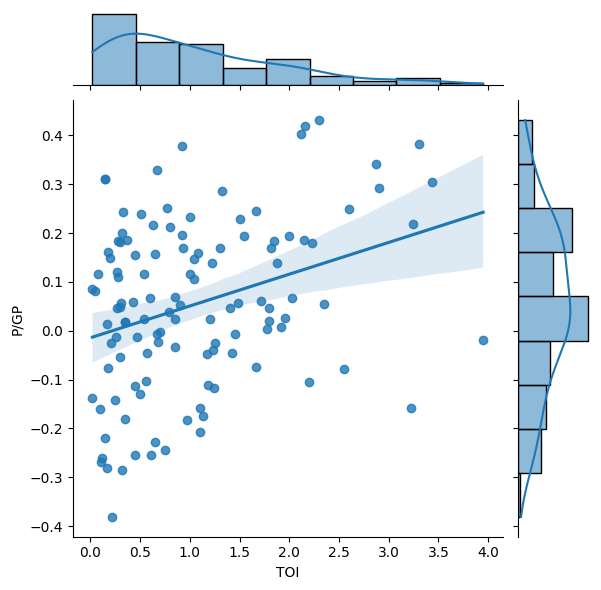

In [43]:
x = (clean2018['TOI'][moreIce]) - (clean2017['TOI'][moreIce])
y = clean2018['P/GP'][moreIce] - clean2017['P/GP'][moreIce]
sns.jointplot(x =x, y =y, kind='reg')

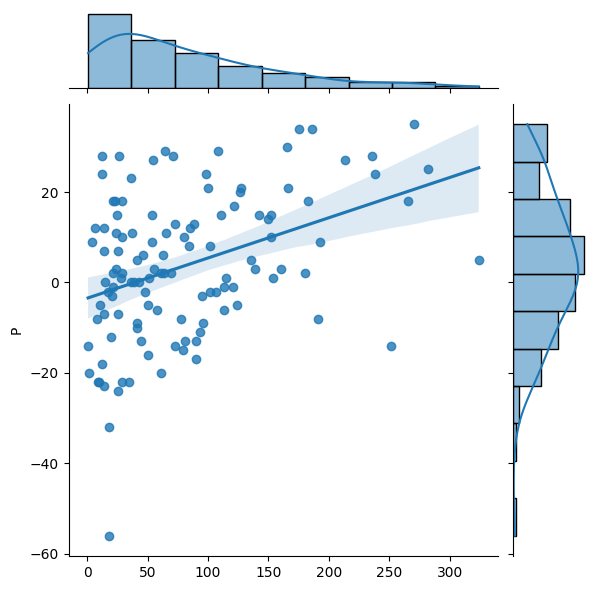

In [44]:
x2 = (clean2018['TOI'][moreIce]*clean2018['GP'][moreIce]) - (clean2017['TOI'][moreIce]*clean2018['GP'][moreIce])
y2 = clean2018['P'][moreIce] - clean2017['P'][moreIce]
sns.jointplot(x =x2, y =y2, kind='reg')

Text(200, -50, 'y = -3.4866 + 0.0891x')

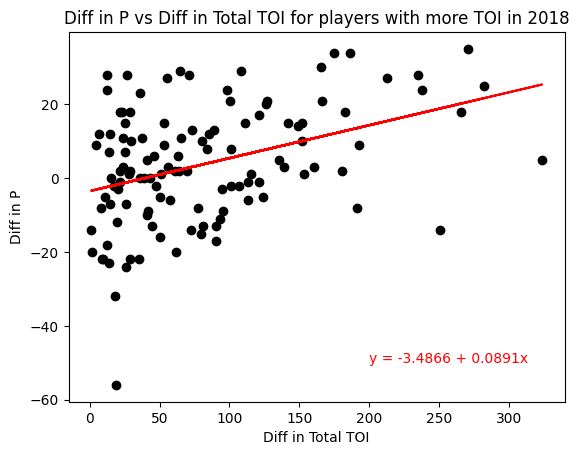

In [45]:
c, d = np.polyfit(x2,y2, 1)
plt.scatter(x2,y2, color = 'black')
plt.plot(x2, c*x2 +d, color='red') 
plt.title("Diff in P vs Diff in Total TOI for players with more TOI in 2018")
plt.ylabel("Diff in P")
plt.xlabel("Diff in Total TOI")

plt.text(200, -50, 'y = ' + '{:.4f}'.format(d) + ' + {:.4f}'.format(c) + 'x', size=10, color = 'red')

In [63]:
for i in (x).index:
    if y[i]>0:
        y[i] = "Increase"
    else:
        y[i] = "Decrease"
y

0      Decrease
2      Decrease
3      Increase
4      Increase
9      Increase
         ...   
210    Decrease
214    Increase
219    Decrease
220    Decrease
224    Increase
Name: P/GP, Length: 118, dtype: object

<Axes: xlabel='TOI', ylabel='count'>

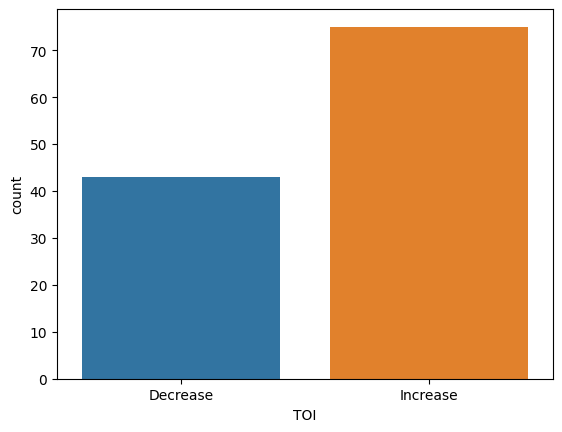

In [62]:
sns.countplot(x=y)
#this shows the amount of players with increased TOI in 2018 compared to 2017 who had an increase in P/GP in 2018

We answered the first question in the last correlation matrix and some of the visual representations used previously for this milestone were the start of expressing answers for the 2nd research question. We would need to go further into depth with similar visualizations like we did when comparing the difference of TOI to the difference of P/GP for the 2017 and 2018 seasons, but for the most part we have answered these questions pretty well.